# Реализация алгоритма обучения персептрона

In [6]:
import numpy as np

class Perceptron(object):
    """ Классификатор на основе персептрона.
    Параметры
    ---------
    eta : float
       Скорость обучения (между 0.0 и 1.0)
    n_iter : int
       Проходы по обучающему набору данных.
    random_state : int
       Начальное значение генератора случайных чисел
       для инициализации случайными весами.
    Атрибуты
    --------
    w_ : одномерный массив
       Веса после подгонки.
    error_ : список
       Количество непавильных классификаций (обновлений) в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        Х : {подобен массиву}, форма = [n_examples, n_features]
           Обучающие векторы, где n_examples - количество образцов
           иn_features - количество признаков.
        y : подобен массиву, форма = [n_examples]
           Целевые значения.
        Возвращает
        ----------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [2]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machimne-learning-databases',
                 'iris', 'iris.data')
print('URL: ', s)

URL:  https://archive.ics.uci.edu\ml\machimne-learning-databases\iris\iris.data


In [3]:
df = pd.read_csv('iris.data', header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


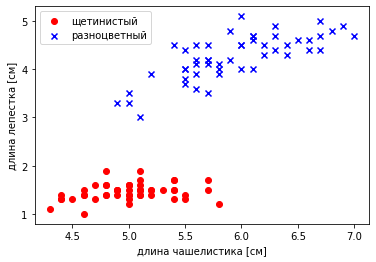

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# выбрать ирис щетинистый и ирис разноцветный
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# извечь длуну чашелистика и длину лепестка
X = df.iloc[0:100, [0, 2]].values
# вычертить график для данных
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

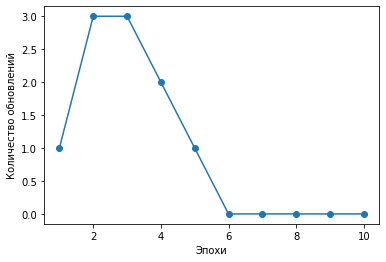

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel("Количество обновлений")
plt.show()

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # настроить генератор маркеров и екарту цветов
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

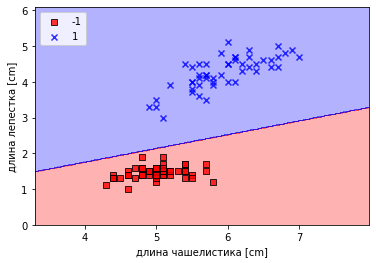

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("длина чашелистика [cm]")
plt.ylabel("длина лепестка [cm]")
plt.legend(loc="upper left")
plt.show()

# Адаптивные инейные нейроны и сходимость обучения